<a href="https://colab.research.google.com/github/nooralthwabtah/Task-3-Afaaq/blob/main/Task_3_Afaaq_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Import libraries**

In [568]:
import pandas as pd  # to upload the data and deal with it
import numpy as np   #  to deal with numeracal values
import seaborn as sns  # for graphs
import matplotlib.pyplot as plt  # for graphs
from sklearn.model_selection import train_test_split, cross_val_score  # to divide the data
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize  # to convers the data
from sklearn.decomposition import PCA # to reduce data dimensionality
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering # # Import the three clustering algorithms:
# KMeans: To divide the data into a specific number of clusters
# DBSCAN: To detect clusters and outliers
# AgglomerativeClustering: Hierarchical clustering that begins by gradually merging points
from sklearn.metrics import silhouette_score # Import a function to calculate the Silhouette Score, which measures the quality of clustering (the closer it is to 1, the better the clustering)
from scipy.cluster.hierarchy import dendrogram, linkage # Import tools for hierarchical drawing:
# linkage: Creates a hierarchical matrix representing the relationships between samples
# dendrogram: Draws a dendrogram to visualize hierarchical clustering
from sklearn.preprocessing import MinMaxScaler  # to normalize the data to a range of 0 to 1
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
# Import additional metrics for clustering evaluation:

#calinski_harabasz_score:
# Measures the quality of clusters based on their internal cohesion and divergence from each other.
# The higher the value, the better the clustering.

#davies_bouldin_score:
# Also measures the quality of clusters, but in reverse.
# The smaller the value, the better the clustering.





**2.Upload the dataset**

In [569]:
# upload the dataset globaly
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arjunbhasin2013/ccdata")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ccdata


In [570]:
data = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv') # to read the dataset

In [571]:
data # to display all the dataset

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


**3.Exploring & Analysis the dataset**

In [572]:
data.shape # display the number of rows&columns

(8950, 18)

In [573]:
data.head() # display the first 5 rows

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [574]:
data.info() # display columns info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [575]:
data=data.drop(columns=['CUST_ID']) # drop useless column

In [576]:
data.head() # to check

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [577]:
data.columns # display all columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [578]:
# print the uniqe values in columns
for col in data.columns:
  print (col, data[col].unique())
  print('-'*80)

BALANCE [  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564  372.708075]
--------------------------------------------------------------------------------
BALANCE_FREQUENCY [0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]
--------------------------------------------------------------------------------
PURCHASES [  95.4     0.    773.17 ...  291.12  144.4  1093.25]
--------------------------------------------------------------------------------
ONEOFF_PURCHASES [   0.    773.17 1499.   ...  734.4  1012.73 1093.25]
--------------------------------------------------------------------------------
INSTALLMENTS_PURCHASES [  95.4     0.   1333.28 ... 

In [579]:
print (data.isnull().sum()) # check if there is a null values

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [580]:
data= data.dropna() # to drop null values

In [581]:
data # to check

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [582]:
data.describe() # display the statistics of the data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [583]:
data= data[['BALANCE','PURCHASES','CREDIT_LIMIT']] # to determine the main clusters

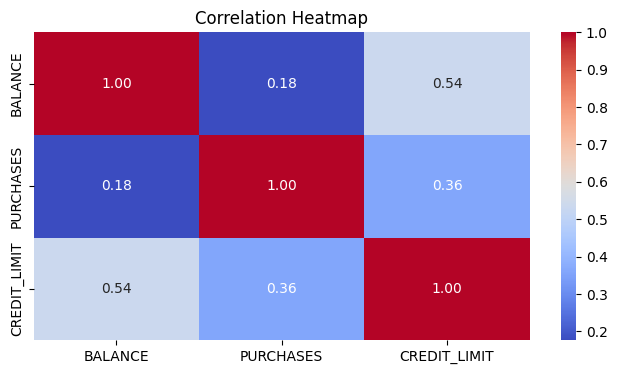

In [584]:
# correlation matrix - heatmap
plt.figure(figsize=(8,4))
sns.heatmap(data[['BALANCE','PURCHASES','CREDIT_LIMIT']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [585]:
# histogram of the values
def plot_histogram(data, column_name):
  plt.figure(figsize=(5,3))
  sns.histplot(data[column_name],kde=True)
  plt.title(f'Distribution of {column_name}')
  col_mean = data[column_name].mean() # calculate the mean
  col_median = data[column_name].median() # calculate the median
  plt.axvline(col_mean, color='red', linestyle='--', label='Mean') # add line for mean
  plt.axvline(col_median, color='green', linestyle='-', label='Median') # add line for median
  plt.legend()
  plt.show()


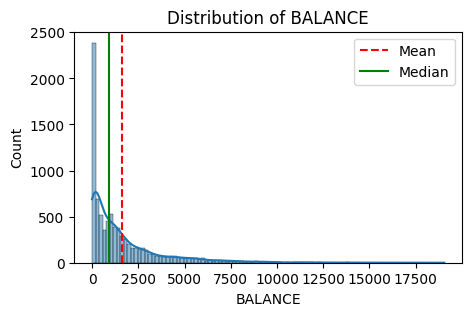

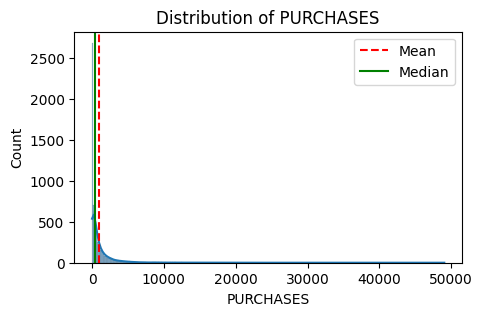

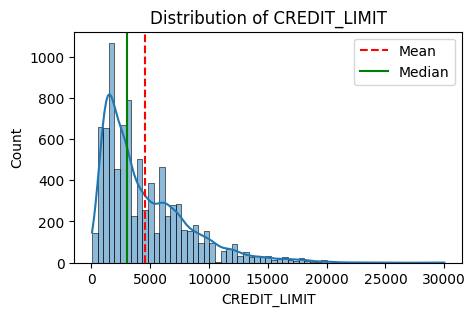

In [586]:
# display the histograms
for col in['BALANCE','PURCHASES','CREDIT_LIMIT']:
  plot_histogram(data, col)

In [587]:
# box plot of the values
def plot_boxplot(data, column_name):
  plt.figure(figsize=(5,3))
  sns.boxplot(y=data[column_name])
  plt.title(f'Box plot of {column_name}')
  plt.ylabel(column_name)
  plt.show()

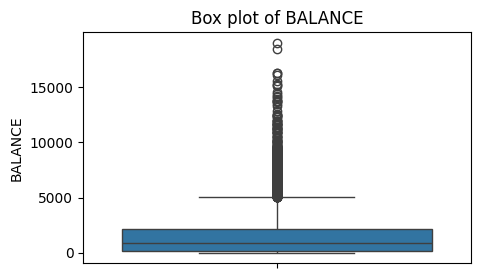

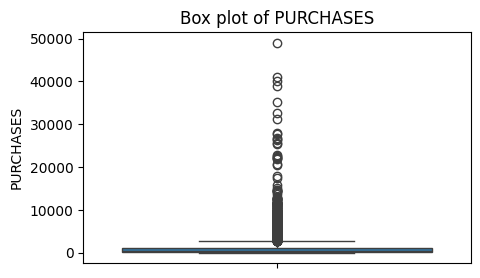

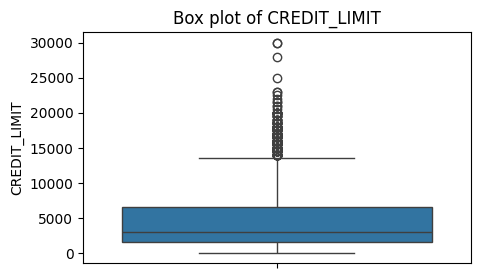

In [588]:
# display the box plots
for col in['BALANCE','PURCHASES','CREDIT_LIMIT']:
  plot_boxplot(data, col)

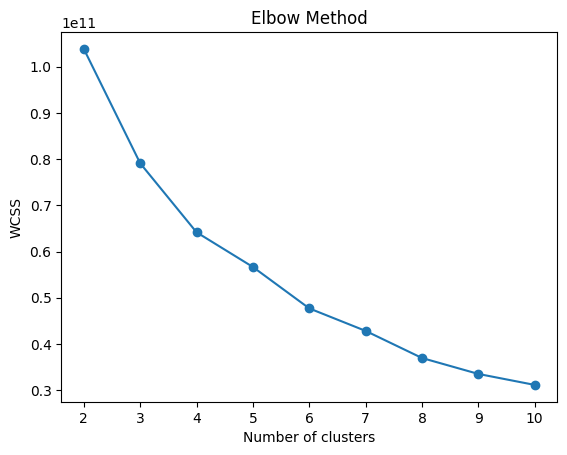

In [589]:
wcss = []  # Initialize an empty list to store Within-Cluster Sum of Squares (WCSS) values

# Loop through different values of cluster numbers (from 2 to 10)
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i) # Create a KMeans model with i clusters
    kmeans.fit(data)  # Fit the model to the data
    wcss.append(kmeans.inertia_)  # Store the WCSS value (inertia_) for this number of clusters

# Plot the WCSS values for each number of clusters to find the "elbow"
plt.plot(range(2, 11), wcss, marker='o')  # Create a line plot with dots at each WCSS point
plt.title('Elbow Method')  # Set the title of the plot
plt.xlabel('Number of clusters')  # Label the x-axis
plt.ylabel('WCSS')  # Label the y-axis
plt.show()  # Display the plot


In [590]:
# to do the scaling for all the data
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

**4.Train the models**

In [591]:
# to apply the k-means algorithm
kmeans = KMeans(n_clusters=5, random_state=42)

In [592]:
# to bring the clusters
clusters= kmeans.fit_predict(data)

In [593]:
# to make a data copy
data_copy= data.copy()

In [594]:
data_copy['cridet_card_segments']= clusters

In [595]:
# to check
data_copy

,BALANCE,PURCHASES,CREDIT_LIMIT,cridet_card_segments
0,-0.744625,-0.429184,-0.962575,1
1,0.764152,-0.473208,0.677204,0
2,0.426602,-0.116413,0.813852,0
3,-0.373910,-0.465825,-0.907916,1
4,0.099551,0.142062,-0.743938,1
...,...,...,...,...
8631,-0.761342,-0.463563,-1.099224,1
8632,-0.750546,-0.338865,-0.962575,1
8633,-0.752977,-0.406572,-0.962575,1
8634,-0.757721,-0.473208,-1.099224,1


In [596]:
# to map the clusters
data_copy['cridet_card_segments']= data_copy['cridet_card_segments'].map({0:'cluster1',1:'cluster2',2:'cluster3',3:'cluster4',4:'cluster5'})

In [597]:
# to check
data_copy

,BALANCE,PURCHASES,CREDIT_LIMIT,cridet_card_segments
0,-0.744625,-0.429184,-0.962575,cluster2
1,0.764152,-0.473208,0.677204,cluster1
2,0.426602,-0.116413,0.813852,cluster1
3,-0.373910,-0.465825,-0.907916,cluster2
4,0.099551,0.142062,-0.743938,cluster2
...,...,...,...,...
8631,-0.761342,-0.463563,-1.099224,cluster2
8632,-0.750546,-0.338865,-0.962575,cluster2
8633,-0.752977,-0.406572,-0.962575,cluster2
8634,-0.757721,-0.473208,-1.099224,cluster2


In [598]:
# to plot the clusters
import plotly.graph_objects as go
PLOT= go.Figure()
# 3d plot
for i in data_copy['cridet_card_segments'].unique():
  PLOT.add_trace(go.Scatter3d(x= data_copy[data_copy['cridet_card_segments']==i]['BALANCE'],
                              y= data_copy[data_copy['cridet_card_segments']==i]['PURCHASES'],
                              z= data_copy[data_copy['cridet_card_segments']==i]['CREDIT_LIMIT'],
                              mode='markers', marker_size= 6, marker_line_width= 1,
                              name=str(i)))
 # disgn the plot
PLOT.update_traces(hovertemplate= 'BALANCE: %{x} <br>PURCHASES %{y} <br>CREDIT_LIMIT: %{z}')
PLOT.update_layout(width= 800, height= 800, autosize= True, showlegend= True,
                   scene= dict(xaxis= dict(title= 'BALANCE', titlefont_color= 'black'),
                               yaxis= dict(title= 'PURCHASES', titlefont_color= 'black'),
                               zaxis= dict(title= 'CREDIT_LIMI', titlefont_color= 'black')),
                   font= dict(family= 'Gilroy', color= 'black', size= 12))




In [599]:
# to apply the DBSCAN algorithm
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(data)

In [600]:
# Store DBSCAN results
data_copy_DB = data_copy.copy()
data_copy_DB['cridet_card_segments_DB'] = dbscan_labels

In [601]:
# Map DBSCAN labels to names
unique_dbscan = [c for c in sorted(data_copy_DB['cridet_card_segments_DB'].unique()) if c != -1]
dbscan_mapping = {c: f'cluster{c+1}' for c in unique_dbscan}
dbscan_mapping[-1] = 'noise'
data_copy_DB['cridet_card_segments_DB'] = data_copy_DB['cridet_card_segments_DB'].map(dbscan_mapping)

In [602]:
data_copy_DB # to check

,BALANCE,PURCHASES,CREDIT_LIMIT,cridet_card_segments,cridet_card_segments_DB
0,-0.744625,-0.429184,-0.962575,cluster2,cluster1
1,0.764152,-0.473208,0.677204,cluster1,cluster1
2,0.426602,-0.116413,0.813852,cluster1,cluster1
3,-0.373910,-0.465825,-0.907916,cluster2,cluster1
4,0.099551,0.142062,-0.743938,cluster2,cluster1
...,...,...,...,...,...
8631,-0.761342,-0.463563,-1.099224,cluster2,cluster1
8632,-0.750546,-0.338865,-0.962575,cluster2,cluster1
8633,-0.752977,-0.406572,-0.962575,cluster2,cluster1
8634,-0.757721,-0.473208,-1.099224,cluster2,cluster1


In [603]:
#3D Plot for DBSCAN
for i in data_copy_DB['cridet_card_segments_DB'].unique():
  PLOT.add_trace(go.Scatter3d(x= data_copy_DB[data_copy_DB['cridet_card_segments_DB']==i]['BALANCE'],
                              y= data_copy_DB[data_copy_DB['cridet_card_segments_DB']==i]['PURCHASES'],
                              z= data_copy_DB[data_copy_DB['cridet_card_segments_DB']==i]['CREDIT_LIMIT'],
                              mode='markers', marker_size= 6, marker_line_width= 1,
                              name=str(i)))
 # disgn the plot
PLOT.update_traces(hovertemplate= 'BALANCE: %{x} <br>PURCHASES %{y} <br>CREDIT_LIMIT: %{z}')
PLOT.update_layout(width= 800, height= 800, autosize= True, showlegend= True,
                   scene= dict(xaxis= dict(title= 'BALANCE', titlefont_color= 'black'),
                               yaxis= dict(title= 'PURCHASES', titlefont_color= 'black'),
                               zaxis= dict(title= 'CREDIT_LIMI', titlefont_color= 'black')),
                   font= dict(family= 'Gilroy', color= 'black', size= 12))

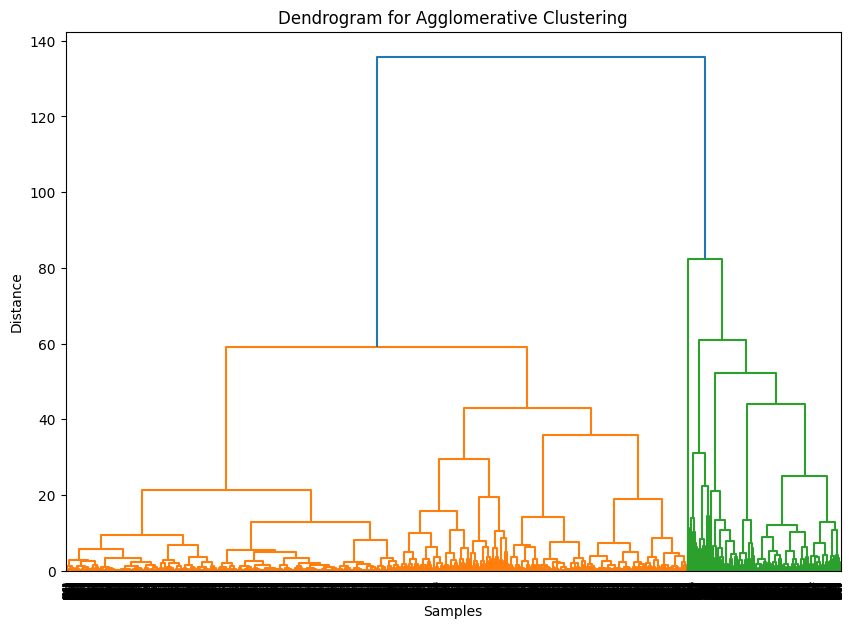

In [604]:
# Dendrogram
linked = linkage(data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [605]:
# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5, linkage='ward')
agglo_labels = agglo.fit_predict(data)

In [606]:
# Store AGG results
data_copy_AG = data_copy.copy()
data_copy_AG['cridet_card_segments_AG'] = agglo_labels

In [607]:
# to map the clusters
data_copy_AG['cridet_card_segments_AG']= data_copy_AG['cridet_card_segments_AG'].map({0:'cluster1',1:'cluster2',2:'cluster3',3:'cluster4',4:'cluster5'})

In [608]:
data_copy_AG # to check

,BALANCE,PURCHASES,CREDIT_LIMIT,cridet_card_segments,cridet_card_segments_AG
0,-0.744625,-0.429184,-0.962575,cluster2,cluster5
1,0.764152,-0.473208,0.677204,cluster1,cluster1
2,0.426602,-0.116413,0.813852,cluster1,cluster1
3,-0.373910,-0.465825,-0.907916,cluster2,cluster5
4,0.099551,0.142062,-0.743938,cluster2,cluster2
...,...,...,...,...,...
8631,-0.761342,-0.463563,-1.099224,cluster2,cluster5
8632,-0.750546,-0.338865,-0.962575,cluster2,cluster5
8633,-0.752977,-0.406572,-0.962575,cluster2,cluster5
8634,-0.757721,-0.473208,-1.099224,cluster2,cluster5


In [609]:
#3D Plot for AGG
for i in data_copy_AG['cridet_card_segments_AG'].unique():
  PLOT.add_trace(go.Scatter3d(x= data_copy_AG[data_copy_AG['cridet_card_segments_AG']==i]['BALANCE'],
                              y= data_copy_AG[data_copy_AG['cridet_card_segments_AG']==i]['PURCHASES'],
                              z= data_copy_AG[data_copy_AG['cridet_card_segments_AG']==i]['CREDIT_LIMIT'],
                              mode='markers', marker_size= 6, marker_line_width= 1,
                              name=str(i)))
 # disgn the plot
PLOT.update_traces(hovertemplate= 'BALANCE: %{x} <br>PURCHASES %{y} <br>CREDIT_LIMIT: %{z}')
PLOT.update_layout(width= 800, height= 800, autosize= True, showlegend= True,
                   scene= dict(xaxis= dict(title= 'BALANCE', titlefont_color= 'black'),
                               yaxis= dict(title= 'PURCHASES', titlefont_color= 'black'),
                               zaxis= dict(title= 'CREDIT_LIMI', titlefont_color= 'black')),
                   font= dict(family= 'Gilroy', color= 'black', size= 12))

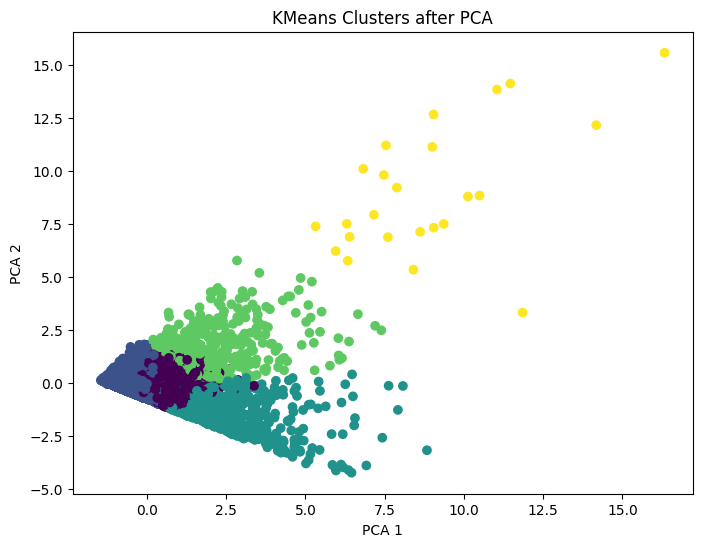

In [610]:
# Applying PCA for Kmeans
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.title('KMeans Clusters after PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


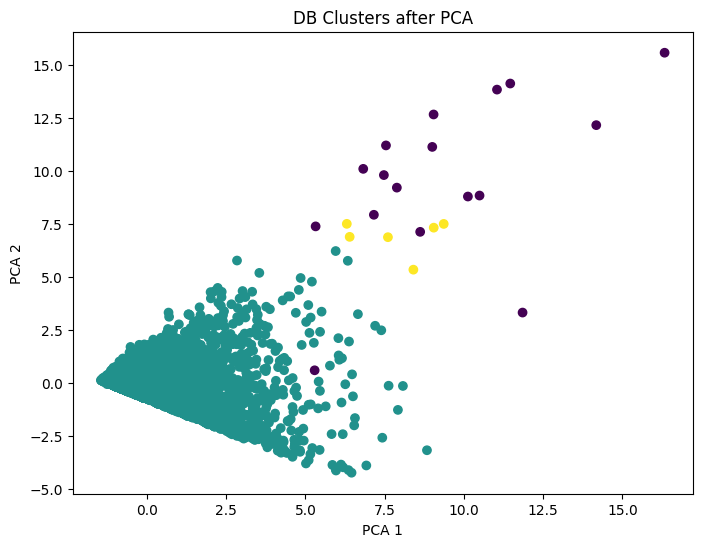

In [611]:
# Applying PCA for DB
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DB Clusters after PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

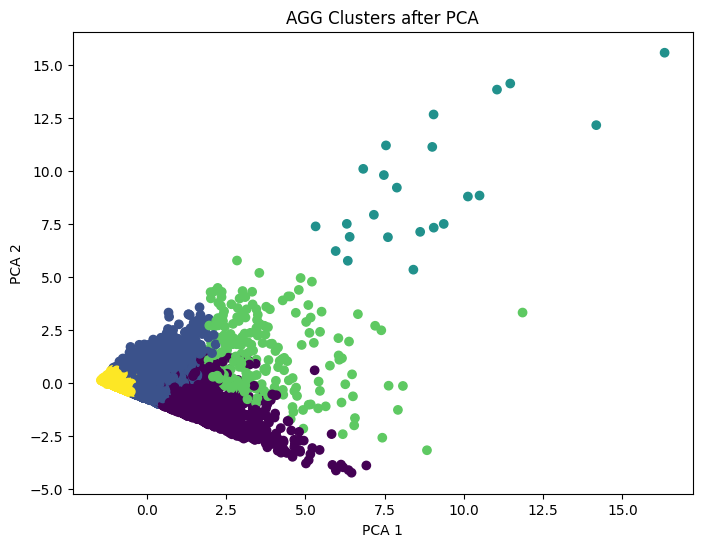

In [612]:
# Applying PCA for AGG
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=agglo_labels, cmap='viridis')
plt.title('AGG Clusters after PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [613]:
# Silhouette Score Comparison (except DBSCAN with noise)
print("Silhouette Scores:")
print(f"  - KMeans:        {silhouette_score(pca_data, clusters):.3f}")
print(f"  - Agglomerative: {silhouette_score(pca_data, agglo_labels):.3f}")

# DBSCAN Score only if no noise (-1) or few noise points
if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
    print(f"  - DBSCAN (excluding noise): {silhouette_score(pca_data[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1]):.3f}")
elif len(set(dbscan_labels)) > 1:
    print(f"  - DBSCAN: {silhouette_score(pca_data, dbscan_labels):.3f}")
else:
    print("  - DBSCAN: Not applicable (only one cluster or all noise)")#

Silhouette Scores:
  - KMeans:        0.420
  - Agglomerative: 0.346
  - DBSCAN (excluding noise): 0.847
